In [1]:
import pandas as pd
data_path = '/content/235-Nov.csv'
traffic_data = pd.read_csv(data_path)
traffic_data.head()

,owner-id,network-id,date,time,utc-offset,start-ime,end-time,detector-id,status,lane-id,...,small-class-count,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,month,day
0,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB EN,OK,1,...,0,0,0,OpenTMS-Detector46573-0,w,unknown,60,ON_RAMP,11,10
1,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RL,OK,4,...,0,1,0,OpenTMS-Detector46573-1,w,unknown,60,NORMAL,11,10
2,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RCL,OK,3,...,0,0,0,OpenTMS-Detector46573-2,w,unknown,60,NORMAL,11,10
3,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LCL,OK,2,...,0,0,0,OpenTMS-Detector46573-3,w,unknown,60,NORMAL,11,10
4,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LL,OK,1,...,0,0,0,OpenTMS-Detector46573-4,w,unknown,60,NORMAL,11,10


In [8]:
import pandas as pd
data = pd.read_csv('/content/235-Nov.csv')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/235-Nov.csv')
data['time'] = pd.to_datetime(data['time'], format='%H%M%S', errors='coerce').dt.hour
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

In [14]:
def convert_time_to_hours(time_str):
    time_str = time_str.zfill(6)
    return int(time_str[:2])
traffic_data['time'] = traffic_data['time'].apply(lambda x: convert_time_to_hours(str(x)))
traffic_data[['time']].head()

,time
0,8
1,8
2,8
3,8
4,8


In [18]:
occupancy_dict = {}
for date in data['date'].unique():
    daily_data = data[data['date'] == date]
    average_occupancy = daily_data['lane-occupancy'].mean()
    occupancy_dict[date] = average_occupancy
for date, occupancy in occupancy_dict.items():
    print(f"Date: {date}, Average Lane Occupancy: {occupancy}")


Date: 2021-11-10 00:00:00, Average Lane Occupancy: 4.478697674418605
Date: 2021-11-02 00:00:00, Average Lane Occupancy: 4.229873193748157
Date: 2021-11-08 00:00:00, Average Lane Occupancy: 4.288217149907465
Date: 2021-11-11 00:00:00, Average Lane Occupancy: 2.362357414448669
Date: 2021-11-03 00:00:00, Average Lane Occupancy: 1.8052338530066816
Date: 2021-11-09 00:00:00, Average Lane Occupancy: 1.9666355140186915


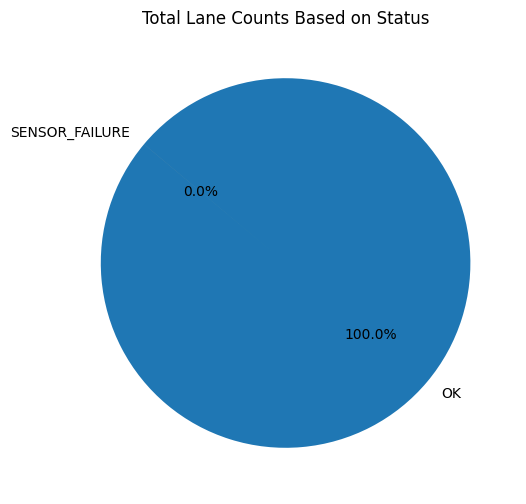

In [19]:
import matplotlib.pyplot as plt
status_counts = data['status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Lane Counts Based on Status')
plt.show()

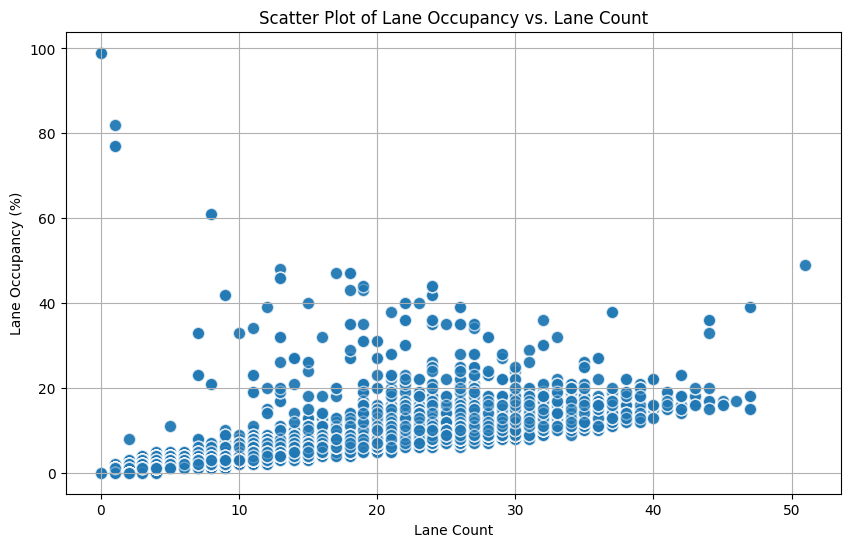

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lane-count'], data['lane-occupancy'], alpha=0.6, edgecolors='w', s=80)
plt.title('Scatter Plot of Lane Occupancy vs. Lane Count')
plt.xlabel('Lane Count')
plt.ylabel('Lane Occupancy (%)')
plt.grid(True)
plt.show()
